<a href="https://colab.research.google.com/github/davidho27941/ML_tutorial_notebook/blob/main/Numpy_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 利用NumPy建立簡單迴歸模型

在開始學習利用各種機器學習平台進行機器學習的建模以及訓練前，我們可以藉由最基本的範例來了解機器學習是怎麼樣去對一筆數據進行學習、並調整參數至最接近目標的狀態。

在這章節，我們將用`Numpy`函式庫來演示最基本的線性回歸是如何完成的。


## 範例簡介

在本範例中，我們將利用以下的函數

$y = a + bx + cx^{2} + dx^{3}$

來對目標函數

$y = sin(x)$

進行線性回歸。

首先，我會會先將`a`, `b`, `c`, `d`四個參數設定為隨機亂數。在訓練過程中，我們將不斷的計算每次的梯度值，並利用每次的梯度值來對各項參數進行更新，此做法被稱為**[梯度下降法](https://zh.wikipedia.org/wiki/%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%95)**。 

### 載入函式庫

首先，我們載入需要用到的函式庫

* Numpy 
* Math

In [ ]:
import numpy as np
import math

### 初始化變數

接下來，我們要初始化所需要用到的變數，我們將會需要：

* `(x, y)` 作為目標函數
* `(a, b, c, d)` 作為學習用的隨機參數
* `learning rate` 作為學習機率參數，用來參與梯度下降法的計算

In [ ]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6

### 進行迭代

接下來，我們將進行3000次迭代來完成線性回歸。在每次的迭代中，我們將會計算每一次迭代時的損失值（loss）並利用預測值以及目標函數之間的差異計算梯度，並利用[反向傳播法](https://zh.wikipedia.org/wiki/%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95)更新權重。

In [ ]:
for t in range(4000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3')

99 98.62100121320537
199 71.75007370224321
299 52.94491886138292
399 39.77523892659341
499 30.546823724866616
599 24.076578968328988
699 19.537744396638498
799 16.352177207625267
899 14.11532644682124
999 12.54393462983472
1099 11.439553481993801
1199 10.66307279169694
1299 10.116925161445282
1399 9.732644891496454
1499 9.462164326804777
1599 9.271721040015944
1699 9.137590104074341
1799 9.043093032644485
1899 8.976500330744315
1999 8.929559912910118
2099 8.896464121379047
2199 8.873124279528067
2299 8.856660994738695
2399 8.845045894640892
2499 8.836849704153519
2599 8.831065031709661
2699 8.826981664478291
2799 8.824098784230472
2899 8.82206315316458
2999 8.820625573607114
3099 8.819610210611476
3199 8.818892971621818
3299 8.818386265374201
3399 8.818028255232807
3499 8.817775279900403
3599 8.817596506851286
3699 8.81747016001804
3799 8.817380857708958
3899 8.817317733674384
3999 8.817273110711643
Result: y = 0.00035 + 0.85671 x + -0.00006 x^2 + -0.09333 x^3


## 檢視成果

經由上一步中的迭代，我們取得了一組參數(a, b, c, d)。我們可以利用繪圖的方式來觀察這一筆參數所描繪的曲線與我們的目標函數（正弦函數）之間有多大的差距。

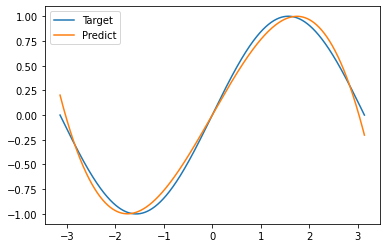

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, label = 'Target')
plt.plot(x, a+b*x+c*x**2+d*x**3, label='Predict')
plt.legend(loc = 'upper left')
plt.show()

由上方的圖例可以發現，雖然仍有些差距，但我們的線性回歸表現出了相當不錯的成果。如果想要或許更加接近的表現，可以藉由調`整學習率（learning rate）`或是改變我們所設定的函數$y = a + bx + cx^{2} + dx^{3}$來改善線性回歸的表現。

99 5602.051857883535
199 2495.5478719532102
299 1119.2311175700254
399 508.3960360058395
499 236.76933795191098
599 115.72254666395148
699 61.65197569740908
799 37.43643246779677
899 26.56079019321989
999 21.661348764834973
1099 19.446864410744833
1199 18.442400474342616
1299 17.985071581949367
1399 17.776023837982194
1499 17.680069303592816
1599 17.635835172825857
1699 17.615352989395824
1799 17.60582589069
1899 17.601374124021103
1999 17.59928437048676
2099 17.598298921461314
2199 17.59783213578057
2299 17.597610062399504
2399 17.597503964290787
2499 17.59745306933415
2599 17.597428561142472
2699 17.597416716477746
2799 17.597410972543724
2899 17.597408178273263
2999 17.59740681495878
3099 17.597406148014485
Result: y = -0.00002 + 0.85686 x + 0.00000 x^2 + -0.09336 x^3


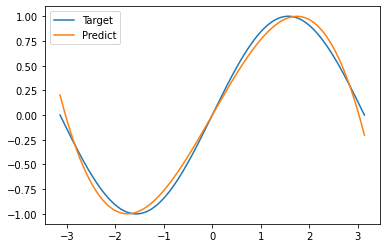

In [ ]:
#@title 牛刀小試
#@markdown 接下來，請自行調整學習率以及模型來觀察對線性回歸的表現會有怎樣的影響。

#@markdown 設定學習率
lr = 0.000001 #@param [0.00001, 0.000001, 0.0000001, 0.00000001] {type:"raw"} 

#@markdown 設定迭代次數
NUM_ITER = 3100 #@param {type:"slider", min:100, max:10000, step:400} 

#@markdown 設定用來進行線性回歸的函數

#@markdown 模式A : $y = a + bx$

#@markdown 模式B : $y = a + bx + cx^{2}$

#@markdown 模式C : $y = a + bx + cx^{2} + dx^{3}$

#@markdown 模式D : $y = a + bx + cx^{2} + dx^{3} + ex^{4}$

Y_PRED = 'C' #@param ["'A'", "'B'", "'C'", "'D'"] {type:"raw"}

def reg_func(num_iter, learning_rate, target_func):
    
    x = np.linspace(-math.pi, math.pi, 4000)
    y = np.sin(x)

    if target_func == "A":
        a = np.random.randn()
        b = np.random.randn() 
    elif target_func == "B":
        a = np.random.randn()
        b = np.random.randn() 
        c = np.random.randn()
    elif target_func == "C":
        a = np.random.randn()
        b = np.random.randn() 
        c = np.random.randn()
        d = np.random.randn()
    elif target_func == "D":
        a = np.random.randn()
        b = np.random.randn() 
        c = np.random.randn()
        d = np.random.randn()
        e = np.random.randn()

    for t in range(num_iter):
        # Forward pass: compute predicted y
        
        if target_func == "A":
            y_pred = a + b * x 
        elif target_func == "B":
            y_pred = a + b * x + c * x ** 2 
        elif target_func == "C":
            y_pred = a + b * x + c * x ** 2 + d * x ** 3
        elif target_func == "D":
            y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

        # Compute and print loss
        loss = np.square(y_pred - y).sum()
        if t % 100 == 99:
            print(t, loss)

        # Backprop to compute gradients of a, b, c, d with respect to loss
        # Update weights
        if target_func == "A":
            grad_y_pred = 2.0 * (y_pred - y)
            grad_a = grad_y_pred.sum()
            grad_b = (grad_y_pred * x).sum()

            a -= learning_rate * grad_a
            b -= learning_rate * grad_b
        elif target_func == "B":
            grad_y_pred = 2.0 * (y_pred - y)
            grad_a = grad_y_pred.sum()
            grad_b = (grad_y_pred * x).sum()
            grad_c = (grad_y_pred * x ** 2).sum()

            a -= learning_rate * grad_a
            b -= learning_rate * grad_b
            c -= learning_rate * grad_c
        elif target_func == "C":
            grad_y_pred = 2.0 * (y_pred - y)
            grad_a = grad_y_pred.sum()
            grad_b = (grad_y_pred * x).sum()
            grad_c = (grad_y_pred * x ** 2).sum()
            grad_d = (grad_y_pred * x ** 3).sum()

            a -= learning_rate * grad_a
            b -= learning_rate * grad_b
            c -= learning_rate * grad_c
            d -= learning_rate * grad_d
        elif target_func == "D":
            grad_y_pred = 2.0 * (y_pred - y)
            grad_a = grad_y_pred.sum()
            grad_b = (grad_y_pred * x).sum()
            grad_c = (grad_y_pred * x ** 2).sum()
            grad_d = (grad_y_pred * x ** 3).sum()
            grad_e = (grad_y_pred * x ** 4).sum()

            a -= learning_rate * grad_a
            b -= learning_rate * grad_b
            c -= learning_rate * grad_c
            d -= learning_rate * grad_d
            e -= learning_rate * grad_e

    if target_func == "A":
        print(f'Result: y = {a:.5f} + {b:.5f} x')
        plt.plot(x, y, label = 'Target')
        plt.plot(x, a+b*x, label='Predict')
        plt.legend(loc = 'upper left')
        plt.show()
    elif target_func == "B":
        print(f'Result: y = {a:.5f} + {b:.5f} x + {c:.5f} x^2')
        plt.plot(x, y, label = 'Target')
        plt.plot(x, a+b*x+c*x**2, label='Predict')
        plt.legend(loc = 'upper left')
        plt.show()
    elif target_func == "C":
        print(f'Result: y = {a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3')
        plt.plot(x, y, label = 'Target')
        plt.plot(x, a+b*x+c*x**2+d*x**3, label='Predict')
        plt.legend(loc = 'upper left')
        plt.show()
    elif target_func == "D":
        print(f'Result: y = {a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3 + {e:.5f} x^4')
        plt.plot(x, y, label = 'Target')
        plt.plot(x, a+b*x+c*x**2+d*x**3+e*x**4, label='Predict')
        plt.legend(loc = 'upper left')
        plt.show()
    

reg_func(NUM_ITER, lr, Y_PRED)
